In [26]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
data = pd.read_csv('./data/Melbourne/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [28]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target feature. Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target values.

In [29]:
data.dropna(subset=['Price'], axis=0, inplace=True)
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
27243,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
27244,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
27245,Yarraville,12/37 Stephen St,3,h,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [30]:
geo_features = ['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [31]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].mean())
    
cat_data = data[cat_feat]
num_data = data[num_feat]

For feature "YearBuilt" - apply segmentation into bins

In [32]:
# data['YearBuilt'] = pd.cut(data['YearBuilt'], bins=20, labels=range(20))

(array([1.9047e+04, 6.9840e+03, 9.4400e+02, 1.8600e+02, 6.0000e+01,
        2.0000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

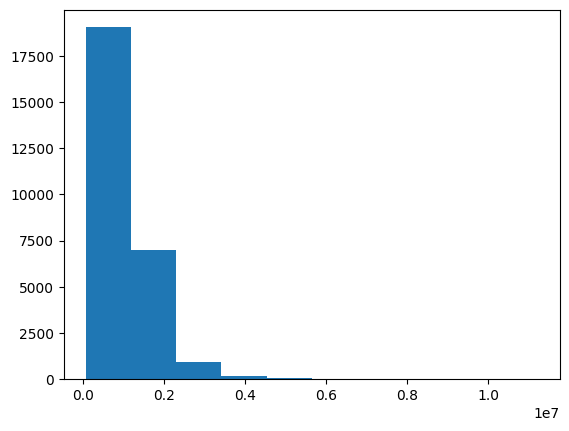

In [33]:
import matplotlib.pyplot as plt

plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range.

(array([ 739., 6027., 7115., 4053., 2993., 1581.,  876.,  529.,  309.,
         205.]),
 array([  85000.,  372500.,  660000.,  947500., 1235000., 1522500.,
        1810000., 2097500., 2385000., 2672500., 2960000.]),
 <BarContainer object of 10 artists>)

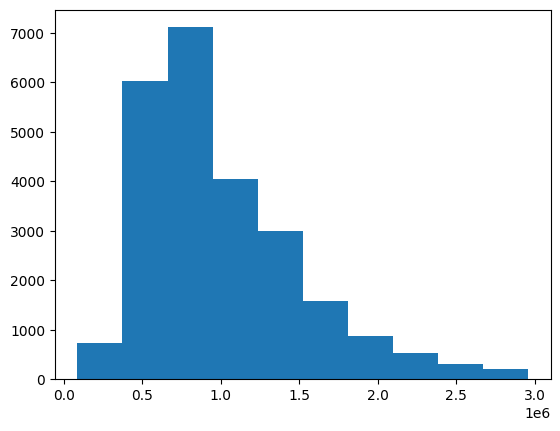

In [34]:
from scipy import stats

data = data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
plt.hist(data['Price'])

In [35]:
position_data

,Lattitude,Longtitude,CouncilArea,Address,Suburb
0,-37.79960,144.99840,Yarra City Council,85 Turner St,Abbotsford
1,-37.80790,144.99340,Yarra City Council,25 Bloomburg St,Abbotsford
2,-37.80930,144.99440,Yarra City Council,5 Charles St,Abbotsford
3,-37.79690,144.99690,Yarra City Council,40 Federation La,Abbotsford
4,-37.80720,144.99410,Yarra City Council,55a Park St,Abbotsford
...,...,...,...,...,...
27242,-37.81053,144.88467,Maribyrnong City Council,13 Burns St,Yarraville
27243,-37.81551,144.88826,Maribyrnong City Council,29A Murray St,Yarraville
27244,-37.82286,144.87856,Maribyrnong City Council,147A Severn St,Yarraville
27245,NaN,NaN,Maribyrnong City Council,12/37 Stephen St,Yarraville


In [36]:
position_data = position_data.iloc[data.index].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

Standardize numerical features and recombine data

In [37]:
cat_data

,Type,Regionname
0,h,Northern Metropolitan
1,h,Northern Metropolitan
2,h,Northern Metropolitan
3,h,Northern Metropolitan
4,h,Northern Metropolitan
...,...,...
27242,h,Western Metropolitan
27243,h,Western Metropolitan
27244,t,Western Metropolitan
27245,h,Western Metropolitan


In [38]:
print(geo_features)

target = data['Price']
data.drop('Price', axis=1, inplace=True)
num_feat.remove('Price')
std_scaler = StandardScaler()

data[num_feat] = std_scaler.fit_transform(data[num_feat])

data

['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']


,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,-1.037314,h,-1.450134,-1.300536,-1.029131,-0.909852,-0.756864,0.091774,-0.062609,Northern Metropolitan,-0.805359
1,-1.037314,h,-1.450134,-1.300536,-1.029131,-2.287532,-0.863798,-1.502386,-3.159503,Northern Metropolitan,-0.805359
2,0.076906,h,-1.450134,0.003265,0.830179,-2.287532,-0.914940,-0.048207,-3.159503,Northern Metropolitan,-0.805359
3,0.076906,h,-1.450134,0.003265,0.830179,-0.909852,-1.007925,0.091774,-0.062609,Northern Metropolitan,-0.805359
4,1.191125,h,-1.450134,0.003265,-1.029131,0.467829,-0.947485,-0.212059,2.140759,Northern Metropolitan,-0.805359
...,...,...,...,...,...,...,...,...,...,...,...
24422,1.191125,h,-0.787545,1.307066,-1.029131,1.845510,0.152070,0.091774,-0.062609,Western Metropolitan,-0.146655
24423,-1.037314,h,-0.787545,-1.300536,0.830179,-0.909852,-0.998627,-0.990351,2.326733,Western Metropolitan,-0.146655
24424,-1.037314,t,-0.787545,-1.300536,-1.029131,0.467829,-0.715021,-0.662649,1.489850,Western Metropolitan,-0.146655
24425,0.076906,h,-0.787545,0.063548,0.070991,0.075700,0.153207,0.091774,-0.062609,Western Metropolitan,-0.146655


## Data preprocessing

One-hot encoding is applied to categorical features "Regionname" and "Type"

In [39]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense(), columns=[str(i) for i in range(11)])
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)

In [40]:
print(data.shape)
data

(24427, 20)


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.037314,-1.450134,-1.300536,-1.029131,-0.909852,-0.756864,0.091774,-0.062609,-0.805359,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.037314,-1.450134,-1.300536,-1.029131,-2.287532,-0.863798,-1.502386,-3.159503,-0.805359,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.076906,-1.450134,0.003265,0.830179,-2.287532,-0.914940,-0.048207,-3.159503,-0.805359,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.076906,-1.450134,0.003265,0.830179,-0.909852,-1.007925,0.091774,-0.062609,-0.805359,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.191125,-1.450134,0.003265,-1.029131,0.467829,-0.947485,-0.212059,2.140759,-0.805359,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24422,1.191125,-0.787545,1.307066,-1.029131,1.845510,0.152070,0.091774,-0.062609,-0.146655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24423,-1.037314,-0.787545,-1.300536,0.830179,-0.909852,-0.998627,-0.990351,2.326733,-0.146655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24424,-1.037314,-0.787545,-1.300536,-1.029131,0.467829,-0.715021,-0.662649,1.489850,-0.146655,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24425,0.076906,-0.787545,0.063548,0.070991,0.075700,0.153207,0.091774,-0.062609,-0.146655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Generate edge index for our graph of real estate.<br>
Creates edge between two entities, if distance between them is under the predefined threshold

In [41]:
import os
import pickle
from GraphEncoder.encoder import DistanceGraphEncoder
edge_index_datafile = "edge_index.pickle"

if os.path.exists(edge_index_datafile):
    index_file = open(edge_index_datafile, 'rb')
    edge_index = pickle.load(index_file)
else:
    EDGE_CREATING_DISTANCE = 2

    graph_encoder = DistanceGraphEncoder(position_data, EDGE_CREATING_DISTANCE)
    edge_index = graph_encoder.transform()
    
    with open("edge_index.pickle", "wb") as output:
        pickle.dump(edge_index, output)

In [42]:
edge_index[0].shape

torch.Size([2087639])

Create DataLoader which devides nodes into set of batches (for learning).<br>
Also, creates custom data-splitter for dividing data into train/val/test parts.

In [43]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

data = Data(
    torch.tensor(data.to_numpy(), dtype=torch.float32),
    edge_index=torch.tensor(edge_index), 
    y=torch.tensor(target.to_numpy(), dtype=torch.float32)
)
node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(data)

data_loader = NeighborLoader(graph, 
                             batch_size=128, 
                             num_neighbors=[20], 
                             shuffle=True,
                             input_nodes=graph.train_mask)

In [44]:
# graph.y.shape

## Applying GNN

In [45]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class GCN(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer)
        self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer)
        self.conv3 = nn_geom.SAGEConv(hidden_layer, hidden_layer)
        self.dropout = nn.Dropout(p=0.3)
        
        # self.linear1 = nn.Linear(hidden_layer, hidden_layer)
        # self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, 1)
        # self.linear4 = nn.Linear(hidden_layer, 1)
    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        x = self.dropout(self.conv1(data, edge_index).relu())
        x = self.dropout(self.conv2(x, edge_index).relu())
        x = self.dropout(self.conv3(x, edge_index).relu())
        # x = self.linear1(x).relu()
        # x = self.linear2(x).relu()
        # x = self.linear3(x).relu()
        
        return self.linear3(x)

- check houses embeddings
- permutation_importance of regressor [check importance of embedding]
- dimensionality reduction in embeddings
- experiment more with embedding sizes (10...)
- number of neighbours in each embedding hop
- add Suburb constraint
- 

In [46]:
model = GCN(graph.x.shape[1], 128)

loss_criteria = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
model

GCN(
  (conv1): SAGEConv(20, 128, aggr=mean)
  (conv2): SAGEConv(128, 128, aggr=mean)
  (conv3): SAGEConv(128, 128, aggr=mean)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear3): Linear(in_features=128, out_features=1, bias=True)
)

In [48]:
import math
from sklearn.metrics import r2_score
import torch_sparse

import warnings
warnings.filterwarnings(action='ignore')

n_epochs = 10
best_mse, best_weights = math.inf, None

for epoch in range(n_epochs):
    model.train()
    for batch in data_loader:
        optim.zero_grad()
        
        predicts = model(batch.x, batch.edge_index)
        loss = loss_criteria(predicts, batch.y)
        loss.backward()
        optim.step()
    
    model.eval()
    predicts = model(graph.x, graph.edge_index)
    mse = loss_criteria(predicts[graph.val_mask], graph.y[graph.val_mask])
    r2 = r2_score(graph.y[graph.val_mask].detach(), predicts[graph.val_mask].detach())
    
    print(f'Epoch #{epoch} | MSE_Loss = {mse:.4e} | R^2 = {r2}')
    
    if mse < best_mse:
        best_mse, best_weights = mse, model.state_dict()

Epoch #0 | MSE_Loss = 2.5318e+11 | R^2 = 0.00825824837457012
Epoch #1 | MSE_Loss = 2.5080e+11 | R^2 = 0.007470237907370225
Epoch #2 | MSE_Loss = 2.5038e+11 | R^2 = -0.0009485155958444125
Epoch #3 | MSE_Loss = 2.5283e+11 | R^2 = -0.009751590992181924
Epoch #4 | MSE_Loss = 2.5138e+11 | R^2 = 0.0011582039831324886
Epoch #5 | MSE_Loss = 2.5328e+11 | R^2 = -0.01366587941988695
Epoch #6 | MSE_Loss = 2.5034e+11 | R^2 = 0.006845734127209568
Epoch #7 | MSE_Loss = 2.5358e+11 | R^2 = -0.004955675681529437
Epoch #8 | MSE_Loss = 2.6079e+11 | R^2 = -0.0311119062728884
Epoch #9 | MSE_Loss = 2.5488e+11 | R^2 = -0.017013327453569538


In [49]:
model.load_state_dict(best_weights)

model.eval()
predicts = model(graph.x, graph.edge_index)
mse = loss_criteria(predicts[graph.test_mask], graph.y[graph.test_mask])
r2 = r2_score(graph.y[graph.test_mask].detach(), predicts[graph.test_mask].detach())

print(f'GNN : MSE_Loss = {mse:.4e} | R^2 = {r2}')

GNN : MSE_Loss = 2.5123e+11 | R^2 = -0.0244647887486531


In [50]:
predicts[graph.test_mask] - graph.y[graph.test_mask]

tensor([[  165726.6250,  -414273.3750,  -184273.3750,  ...,
          -484273.3750,   235726.6250, -1104273.3750],
        [  176846.8750,  -403153.1250,  -173153.1250,  ...,
          -473153.1250,   246846.8750, -1093153.1250],
        [  167273.8750,  -412726.1250,  -182726.1250,  ...,
          -482726.1250,   237273.8750, -1102726.1250],
        ...,
        [  169846.6250,  -410153.3750,  -180153.3750,  ...,
          -480153.3750,   239846.6250, -1100153.3750],
        [  185436.2500,  -394563.7500,  -164563.7500,  ...,
          -464563.7500,   255436.2500, -1084563.7500],
        [  180959.6250,  -399040.3750,  -169040.3750,  ...,
          -469040.3750,   250959.6250, -1089040.3750]], grad_fn=<SubBackward0>)